
# &#128218; Word2vec 시각화

&#128218;  &#128204;

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip insatll konlpy

ERROR: unknown command "insatll" - maybe you meant "install"


In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

## &#128218;1.1. Word2Vec

In [3]:
sentences = [
                ['this', 'is', 'a',   'good',      'product'],
                ['it',   'is', 'a',   'excellent', 'product'],
                ['it',   'is', 'a',   'bad',       'product'],
                ['that', 'is', 'the', 'worst',     'product']
            ]


In [4]:
model = Word2Vec(sentences, size=2, window=3, min_count=1)
# size : 2차원데이터로 압축            

In [6]:
# 어휘집
print(model.wv.vocab.keys())
# 단어벡터
print(model.wv['this'])
# [첫번째 차원값, 두번째 차원값]

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])
[-0.01358666  0.08671311]


In [7]:
# 전체 어휘에 대한 word vector 추출
for   v  in model.wv.vocab.keys():
  print(v)

this
is
a
good
product
it
excellent
bad
that
the
worst


In [9]:
for   v  in model.wv.vocab.keys():
  print(v, model.wv[v]) # 단어, 단어의 벡터값

this [-0.01358666  0.08671311]
is [-0.01874381  0.16257817]
a [0.08291002 0.12132629]
good [-0.1872985   0.15104842]
product [-0.03999775  0.21742108]
it [ 0.16972764 -0.2407595 ]
excellent [-0.0104216  -0.04790725]
bad [-0.12304462  0.0003486 ]
that [-0.0694808   0.09267876]
the [0.21184154 0.05618465]
worst [-0.1428947   0.04874219]


In [10]:
for   v  in model.wv.vocab.keys():
  print(v, model.wv[v])
# 전체 데이터
x = [model.wv[v] for v in model.wv.vocab.keys() ]
print(x)

this [-0.01358666  0.08671311]
is [-0.01874381  0.16257817]
a [0.08291002 0.12132629]
good [-0.1872985   0.15104842]
product [-0.03999775  0.21742108]
it [ 0.16972764 -0.2407595 ]
excellent [-0.0104216  -0.04790725]
bad [-0.12304462  0.0003486 ]
that [-0.0694808   0.09267876]
the [0.21184154 0.05618465]
worst [-0.1428947   0.04874219]
[array([-0.01358666,  0.08671311], dtype=float32), array([-0.01874381,  0.16257817], dtype=float32), array([0.08291002, 0.12132629], dtype=float32), array([-0.1872985 ,  0.15104842], dtype=float32), array([-0.03999775,  0.21742108], dtype=float32), array([ 0.16972764, -0.2407595 ], dtype=float32), array([-0.0104216 , -0.04790725], dtype=float32), array([-0.12304462,  0.0003486 ], dtype=float32), array([-0.0694808 ,  0.09267876], dtype=float32), array([0.21184154, 0.05618465], dtype=float32), array([-0.1428947 ,  0.04874219], dtype=float32)]


In [13]:
# array함수로 만들자.
x = np.array([model.wv[v] for v in model.wv.vocab.keys() ])
print(x)
print(x.shape) # 11x2 단어 수 by dimension

[[-0.01358666  0.08671311]
 [-0.01874381  0.16257817]
 [ 0.08291002  0.12132629]
 [-0.1872985   0.15104842]
 [-0.03999775  0.21742108]
 [ 0.16972764 -0.2407595 ]
 [-0.0104216  -0.04790725]
 [-0.12304462  0.0003486 ]
 [-0.0694808   0.09267876]
 [ 0.21184154  0.05618465]
 [-0.1428947   0.04874219]]
(11, 2)


## &#128218; 1.2. 그래프를 통한 시각화

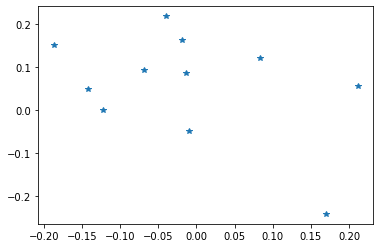

In [15]:
# 연속데이터가 아님.
# x = np.array([model.wv[v] for v in model.wv.vocab.keys() ])
plt.plot(x[:,0],x[:,1], '*')

In [18]:
label = list(model.wv.vocab.keys())
print(label[0])
label[0], x[0, :]

this


('this', array([-0.01358666,  0.08671311], dtype=float32))

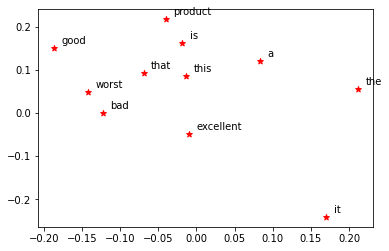

In [19]:
for i in range(11) :
  plt.scatter(  x[i, 0], x[i, 1], marker='*', color='red') # 첫번째 데이터의 x좌표, y좌표
  plt.text(  x[i, 0]+0.01, x[i, 1]+0.01, label[i], fontsize=10)

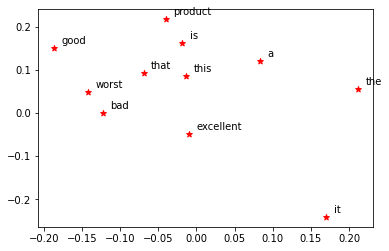

In [26]:
for p, l in zip(x, label) :
  plt.scatter(  p[0], p[1], marker='*', color='red')
  plt.text(  p[0]+0.01, p[1]+0.01, l, fontsize=10)

---
2개의 데이터를 group으로 만들기 예시

In [24]:
# 2개의 데이터를 group으로 만들기 예시
a = [1,2,3]
b = ['a','b','c']

for c in zip(a,b):
  print(c)

for c in zip(a,b): # zip으로 두개의 데이터를 fair로 묶는 것.
  print(c[0], c[1])

for i, j in zip(a,b): # i = c[0], j = c[1]
  print(i, j)

for i, _ in zip(a,b): # i = c[0]
  print(i)


(1, 'a')
(2, 'b')
(3, 'c')
1 a
2 b
3 c
1 a
2 b
3 c
1
2
3


---

## &#128218; 1.3. TSNE를 이용한 w2v시각화

In [28]:
from sklearn.manifold import TSNE

model20 = Word2Vec(sentences, size=20, window=3, min_count=1)

x = np.array([ model20.wv[v] for v in model20.wv.vocab.keys() ] )  

label = list(model20.wv.vocab.keys())

tsne = TSNE(n_components = 2)
x_sne = tsne.fit_transform(x)
# tsne.fit(x)
# x_sne = tsne.transform(x)

print(x_sne.shape)

(11, 2)


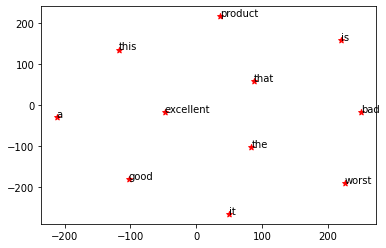

In [29]:
for p, l in zip(x_sne, label) :
  plt.scatter(  p[0], p[1], marker='*', color='red')
  plt.text(  p[0]+0.01, p[1]+0.01, l, fontsize=10)
  # 통계적인 variance유지, 다차원상의 거리를 잘 시각화하는 방법.
  # 이전에 했던 방법은 옳은 방법은 아님. 차원 축소를 하면 많은 데이터가 삭제되기 때문에

(11, 2)


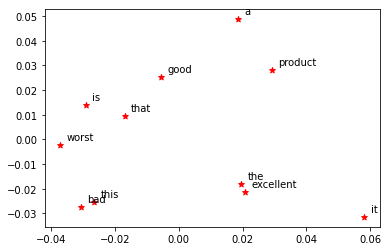

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
print(x_pca.shape)

for p, l in zip(x_pca, label):
  plt.scatter( p[0], p[1], marker='*', color='red')
  plt.text(  p[0]+0.002, p[1]+0.002, l, fontsize=10)
  # 글씨가 많이 떨어진 이유, scale때문에 그렇다.
  # 굉장히 작은 x,y를 보면 알 수 있다.

# &#128204;  Naver 영화 긍정/부정 평가

In [53]:
def read_data(filename):
    with open(filename, 'r', encoding='utf8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:] #header 제외
    return data

train_data = read_data('/content/drive/MyDrive/Colab Notebooks/8월 딥러닝 텐서플로 교과서(길벗, 2021)/자연어처리/ratings_train(축소).txt')
print(len(train_data)) 

7153


In [54]:
train_data[10]

['9008700', '걍인피니트가짱이다.진짜짱이다♥', '1']

In [48]:
!pip install konlpy
from  konlpy.tag import Okt
pos_tagger = Okt()

def tokenize(doc):
    return['/'.join(t) for t in pos_tagger.pos(doc,norm=True,stem=True)]

tokenize('오늘 서울 날씨')    

     |████████████████████████████████| 19.4 MB 120 kB/s 
     |████████████████████████████████| 448 kB 40.8 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


['오늘/Noun', '서울/Noun', '날씨/Noun']

In [55]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data] # 형태소 분리하는 함수

In [56]:
train_docs[0]

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')

In [62]:
!pwd

/content


In [63]:
with open('/content/drive/MyDrive/Colab Notebooks/8월 딥러닝 텐서플로 교과서(길벗, 2021)/자연어처리/train_docs.bin', 'rb') as f: train_docs = pickle.load(f) 

In [64]:
train_docs[1]

(['흠/Noun',
  '.../Punctuation',
  '포스터/Noun',
  '보고/Noun',
  '초딩/Noun',
  '영화/Noun',
  '줄/Noun',
  '..../Punctuation',
  '오버/Noun',
  '연기/Noun',
  '조차/Josa',
  '가볍다/Adjective',
  '않다/Verb'],
 '1')

In [65]:
train_tokens = [doc[0] for doc in train_docs]

# &#128218;명사, 동사, 형용사 추출

In [66]:
def getKeyword(pos) : 
    return [ token.split('/')[0] for token in pos if token.split('/')[1] in ['Noun', 'Verb', 'Adjective']]  

getKeyword(train_tokens[1]) # 형태소 분석된 걸 받아서 필요한 품사들만 추출하는 것.

['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다', '않다']

In [68]:
train_x = [getKeyword(doc)  for doc in train_tokens]

In [69]:
train_x[2]

['무재', '밓었', '다그', '래서', '보다', '추천']

In [70]:
train_x[1000]
#train_tokens[1000]

['정말', '최고', '명작', '성인', '되다', '보다', '이집트', '왕자', '또', '다른', '감동', '자체']

## Word2Vec

In [71]:
%%time
model = Word2Vec(train_x, size=50, window=3, min_count=1) 
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()

CPU times: user 32.3 s, sys: 276 ms, total: 32.6 s
Wall time: 22 s


In [72]:
model.save('naver.w2v')

In [73]:
model.wv.most_similar('재미')

[('감흥', 0.7884562611579895),
 ('꼭좀', 0.7540391683578491),
 ('스릴', 0.7422801852226257),
 ('어이', 0.7239960432052612),
 ('본적', 0.7165219187736511),
 ('흥미', 0.7162571549415588),
 ('맛', 0.7160376310348511),
 ('별거', 0.7070102095603943),
 ('형편', 0.6982492804527283),
 ('잼', 0.6965450048446655)]

In [74]:
vocabs

dict_keys(['더빙', '진짜', '짜증나다', '목소리', '흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍다', '않다', '무재', '밓었', '다그', '래서', '보다', '추천', '교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정', '몬페', '의', '익살스럽다', '돋보이다', '스파이더맨', '늙다', '보이다', '하다', '커스틴', '던스트', '이쁘다', '막', '걸음', '마', '떼다', '세', '초등학교', '학년', '생인', '살다', '반개', '아깝다', '움', '원작', '긴장감', '제대로', '살리다', '별', '욕', '나오다', '이응경', '길용우', '생활', '년', '정말', '발', '해도', '그것', '낫다', '납치', '감금', '반복', '드라마', '가족', '사람', '네', '액션', '있다', '몇', '안되다', '왜', '낮다', '꽤', '볼', '데', '헐리우드', '화려하다', '길들이다', '인피니트', '짱', '볼때', '눈물나다', '죽다', '향수', '자극', '허진호', '감성', '절제', '멜로', '달인', '울면', '손', '횡단보도', '건너다', '때', '뛰다', '치다', '뻔', '이범수', '드럽다', '담백하다', '깔끔하다', '좋다', '로만', '자꾸', '잊어버리다', '그', '이다', '것', '취향', '존중', '다지', '내생', '극장', '가장', '노잼', '노', '감동', '임', '스토리', '어거지', '냥', '매번', '긴장', '되다', '재밌다', '차다', '웃기다', '바스코', '이기', '락스', '코', '끄다', '바비', '아이돌', '깔다', '그냥', '안달', '굿바이', '레닌', '표절', '이해', '뒤', '갈수록', '없어지다', '깨알', '캐스팅', '질퍽', '산뜻하다', '용구성', 

In [75]:
model.wv.most_similar('지루')

[('시시하다', 0.8889091610908508),
 ('늘어지다', 0.8879106044769287),
 ('지루함', 0.8714914321899414),
 ('단조', 0.866223931312561),
 ('심심함', 0.8628064393997192),
 ('산만하다', 0.8607209920883179),
 ('루즈', 0.8593962788581848),
 ('따분하다', 0.8591424822807312),
 ('극치', 0.8534950613975525),
 ('어수선하다', 0.850592315196991)]

In [78]:
model.wv.most_similar(positive=['정우성', '여배우'])  

[('송강호', 0.9437218308448792),
 ('하정우', 0.9322914481163025),
 ('이나영', 0.9300602674484253),
 ('남자배우', 0.9256270527839661),
 ('엄지원', 0.9202160835266113),
 ('신하균', 0.9199410080909729),
 ('이정현', 0.9175741076469421),
 ('주윤발', 0.9166651368141174),
 ('하지원', 0.9159523844718933),
 ('유아인', 0.9154451489448547)]

In [79]:
model.wv.most_similar(positive=['유아인', '재미'])  

[('짐심', 0.8653460144996643),
 ('배두나', 0.8508848547935486),
 ('거참', 0.8426720499992371),
 ('지원이', 0.8390256762504578),
 ('김강우', 0.8377829194068909),
 ('김동욱', 0.835749626159668),
 ('수욜', 0.834247887134552),
 ('유역비', 0.8285170793533325),
 ('영화음악', 0.8282703757286072),
 ('유민', 0.8263508677482605)]

In [80]:
model.wv['재미']

array([-0.90068275, -1.3862664 , -2.2181973 , -1.5681783 , -0.9066489 ,
        0.26723123, -2.2533476 , -2.7440605 ,  1.2017901 , -0.992477  ,
        0.68022656, -0.9769384 ,  0.5918812 ,  0.56504947,  1.6589143 ,
       -0.01317163, -2.3603365 ,  0.7944072 ,  1.2629697 , -0.90054756,
        1.4510434 , -0.4701377 ,  0.83055747,  1.127195  , -1.7534311 ,
        0.0059827 , -1.0592898 , -2.6997938 ,  0.5357034 , -1.0331365 ,
       -0.7236815 ,  0.18913367, -1.644753  ,  2.0193348 ,  0.41621554,
        0.23799144, -0.5142874 ,  1.7396132 , -1.2784591 ,  1.1106025 ,
        0.58138454, -1.3434191 , -1.1376199 , -0.47705075,  0.74349165,
        0.6181422 , -0.43268472,  1.2112783 ,  1.3693264 , -2.458393  ],
      dtype=float32)

In [ ]:
# 영화 감정 평가
# 주인공이 연기력이 떨어져요
# '떨어지다' in vocabs

In [81]:
model.wv.most_similar('연기력')

[('연기', 0.8860905170440674),
 ('캐스팅', 0.8430062532424927),
 ('문정웅', 0.7989305853843689),
 ('열연', 0.7971088886260986),
 ('조연', 0.777251124382019),
 ('중견', 0.7682166695594788),
 ('명연기', 0.7673676013946533),
 ('발연기', 0.7546205520629883),
 ('실력', 0.7520025372505188),
 ('안바', 0.7470966577529907)]

## &#128218; 감정평가

- word2vec에서는 단어를 벡터화
- 문제는 입력은 문장임
- 문장을 고정된 크기의 벡터로 변환하기 위해 평균 벡터를 계산하는 방법을 취함.

주인공이 연기력이 떨어져요    
주인공 ->  1x50    
연기력 ->  1x50    
떨어지다 -> 1x50      

###  &#128218;평균벡터 구하기

In [83]:
a = np.array([1,4])
b = np.array([2,7])
c = np.array([-2,5])

d = ( a + b + c ) / 3
print(d)

[0.33333333 5.33333333]


In [91]:
str = train_x[0]
print(str)
for s    in str  :
  print( model.wv[s] )

['더빙', '진짜', '짜증나다', '목소리']
[-1.6648078  -1.1991465  -1.5761266  -0.9614489  -1.2856572  -0.28167984
 -0.01468388 -2.4348683   1.0807889   0.85928124  0.69845164  1.1144906
  0.01632664 -0.47732186 -0.9156584  -2.3889992   0.35411337 -0.284295
 -1.1644772  -0.54394215 -0.24942407 -0.31473342 -0.921586    1.1906295
  1.3349199  -0.37556574  0.9690566   0.3634996   1.2626494   0.27549666
  0.3551686   1.7899034  -0.5307325   1.4576762   0.06016893  0.13023803
 -0.348388    0.1926251   0.01853279  1.8193828   1.2335926   0.7992362
  0.67423743 -0.29505125  0.3032768   0.19168177 -1.3444182   0.53002715
 -0.6344742   0.59867406]
[-1.9853897e+00 -1.1438965e+00 -1.2465580e+00 -7.0063907e-01
 -8.2045227e-01  4.1202709e-01 -4.3181744e-01 -2.8396979e-02
  7.3494267e-01  2.0116903e-01  5.9800667e-01  2.1778851e+00
 -9.5523477e-01  9.6701431e-01 -1.3508545e+00 -2.4422459e-01
 -3.5115838e-01 -1.6315792e+00 -1.2624645e+00 -3.9576381e-02
  1.0086098e+00 -1.2918712e+00  1.2186493e-01  1.4520034e+00
 

In [89]:
# 문장을 벡터로 변환하는 연습
str = train_x[0]
print(str)
feature = []
for s    in str  :
  #print(model.wv[s])
  feature.append(model.wv[s])

feature = np.array(feature)

print(feature.shape)

['더빙', '진짜', '짜증나다', '목소리']
(4, 50)


In [94]:
str = ['더빙', '진짜', '짜증나다', '목소리']  # train_x[0]
print(str)
feature = []
for s  in str  :
  feature.append(model.wv[s])                 # word vector 누적

feature = np.mean(np.array(feature), axis=0)  # 열기준 평균벡터 계산

print(feature.shape)
print(feature)

['더빙', '진짜', '짜증나다', '목소리']
(50,)
[-1.4578812  -1.1283705  -1.4426199  -0.21165183 -1.0146666  -0.236717
  0.44144338 -1.5459107   0.806277    0.69930285  0.6032386   1.5848831
 -0.59384793 -0.079808   -0.8748346  -1.1742357   0.16842972 -0.35409775
 -0.75518715 -0.30379608  0.12490672 -0.71888655  0.05358897  0.93638444
  0.04040128 -0.21494034  0.22367914  0.07814398  0.88495654  0.01381796
  0.5343159   1.2548182  -0.7107045   1.1595949   0.56360364  1.191109
 -0.8597219   0.878989   -0.07266136  0.6646396   0.4384997   0.5551108
 -0.14429767 -0.0346261   0.5106384   0.41095534 -0.83788204  0.38872337
 -0.1997554  -0.05911285]


In [95]:
str = ['더빙', '진짜', '짜증나다', '목소리', '키보드']  # train_x[0]
print(str)
feature = []
for s  in str  :
  if s in model.wv.vocab  :                            # 학습데이터에 있는 단어만  :
    feature.append(model.wv[s])                 # word vector 누적

feature = np.mean(np.array(feature), axis=0)  # 열기준 평균벡터 계산

print(feature.shape)


['더빙', '진짜', '짜증나다', '목소리', '키보드']
(50,)


In [96]:
str = ['더빙', '진짜', '짜증나다', '목소리', '키보드']  # train_x[0]
str = []  # train_x[0]

print(str)
feature = []
for s  in str  :
  if s in model.wv.vocab  :                            # 학습데이터에 있는 단어만  :
    feature.append(model.wv[s])                 # word vector 누적


if feature ==  [] : 
  feature = np.zeros(50)
else :
  feature = np.mean(np.array(feature), axis=0)  # 열기준 평균벡터 계산

print(feature.shape)
print(feature)

[]
(50,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [99]:
def get_feature(tokens) :
  feature = np.array([model.wv[token] for token in tokens  if token in  model.wv.vocab ] )  
  if feature.size == 0 : 
      return np.zeros(50)
  return np.mean(feature, axis=0)

f = get_feature(['주인공', '연기력', '떨어지다', '비추'])
print(f)

[-0.50196224 -1.4223052  -0.8228472   0.8584287  -1.1413018  -0.7065981
 -0.97655874 -1.3631464   0.7503543  -0.0584631   0.16118734  1.20412
 -0.24138017 -0.3257909  -0.16297138 -0.00619065  0.3373028  -0.6668355
 -0.28449425 -0.40634644 -0.52097267 -0.12730627 -0.1314771   1.10982
  0.25780627  0.65902466 -0.64848775 -0.16602446  0.55662334 -0.97210604
 -1.4899179   1.6555048  -0.36283195  1.3101648   0.5950269   0.14943476
 -1.6524429   1.5899258  -0.3563098   0.41044724 -0.49799183  0.36313465
  0.20502335 -0.7717168  -0.10155066  0.7194653  -0.0937651   0.6976075
 -0.7268365  -0.02566672]


In [101]:
str = '주인공이 연기력이 떨어져서 비추합니다.'
feature = get_feature(getKeyword(tokenize(str))) # 이 문장에 대한 벡터
feature

array([-0.55744946, -0.97736484, -0.8255847 ,  0.66265947, -0.82534564,
       -0.15434733, -0.94135904, -0.91032773,  0.7243921 , -0.19546981,
        0.5090692 ,  1.0069869 , -0.48837596,  0.33961028, -0.09558871,
       -0.70338047, -0.3928203 , -0.5097062 , -0.1158995 , -0.5051263 ,
       -0.34019035, -0.06253085, -0.43567246,  0.66642284,  0.3786313 ,
        0.61310846, -0.75336206, -0.3851031 ,  0.53852665, -0.7172867 ,
       -0.8336364 ,  0.99590766, -0.27180213,  1.226889  ,  0.5002114 ,
        0.4078775 , -1.174969  ,  1.3846838 , -0.6365917 ,  0.31049132,
       -0.60216576,  0.3878103 ,  0.03152289, -0.37541556, -0.36559972,
        0.6771009 , -0.6547533 ,  0.40906167, -0.5110074 , -0.29028147],
      dtype=float32)

### &#128218; 감정평가 문장 벡터 생성

In [103]:
X = np.array([get_feature(tokens) for  tokens in train_x])
y = np.array([float(c) for _,c in train_docs])
print(X.shape, y.shape) # 문장 개수 x 특징 벡터 크기

(150000, 50) (150000,)


### logistic regression을 이용한 감정분류

In [104]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression( max_iter=1000)
reg.fit(X , y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
reg.score(X, y)   # 인식률 79.3%

0.7917533333333333

In [114]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
dt = DecisionTreeClassifier()
dt.fit(X,y)
dt.score(X, y)

0.98918

In [115]:
q = '주인공이 연기력이 떨어져서 비추합니다.'
feature = get_feature(getKeyword(tokenize(q)))  #
print(feature.shape)

p = reg.predict_proba(feature.reshape(-1,50))
print(p[0,1] > 0.5)

p = dt.predict(feature.reshape(-1,50))
print(p == 1 )

(50,)
False
[False]


In [118]:
#  while (True) :
#   q = input()
#   feature = get_feature(getKeyword(tokenize(q)))  #
#   p = reg.predict_proba(feature.reshape(-1,50))
#   print(p[0,1] > 0.5)

## 유저 유사도 기반 협업필터링

FileNotFoundError: ignored

In [137]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/8월 딥러닝 텐서플로 교과서(길벗, 2021)/자연어처리/toy.csv",header=None)
df.columns = ['공조', '더킹', '라라랜드', '컨택트', '너의이름']
df.index = ['재석', '명수', '하하', '준하', '세형', '광희']
df

,공조,더킹,라라랜드,컨택트,너의이름
재석,5,4,4,3,0
명수,1,0,1,0,4
하하,4,4,0,5,3
준하,0,2,1,4,3
세형,4,0,4,4,2
광희,4,2,3,0,1


In [138]:
# 명수와 준하의 유사도
import numpy as np

v1 = df.iloc[1].values
v2 = df.iloc[3].values

q1 = np.sum(v1*v2)
q2 = np.sqrt(np.sum(v1**2))
q3 = np.sqrt(np.sum(v2**2))
s = q1 / (q2*q3)

print(q1, q2, q3, s)

13 4.242640687119285 5.477225575051661 0.5594309277855158


In [139]:
from sklearn.metrics.pairwise import cosine_similarity

distances = cosine_similarity(df)
distances

array([[1.        , 0.26111648, 0.77272727, 0.53935989, 0.81934649,
        0.89893315],
       [0.26111648, 1.        , 0.46420708, 0.55943093, 0.52297636,
        0.47336463],
       [0.77272727, 0.46420708, 1.        , 0.83151316, 0.71692818,
        0.60677988],
       [0.53935989, 0.55943093, 0.83151316, 1.        , 0.65828059,
        0.33333333],
       [0.81934649, 0.52297636, 0.71692818, 0.65828059, 1.        ,
        0.75955453],
       [0.89893315, 0.47336463, 0.60677988, 0.33333333, 0.75955453,
        1.        ]])

In [140]:
df2 = pd.DataFrame(distances)
df2.index = ['재석', '명수', '하하', '준하', '세형', '광희']
df2

,0,1,2,3,4,5
재석,1.000000,0.261116,0.772727,0.539360,0.819346,0.898933
명수,0.261116,1.000000,0.464207,0.559431,0.522976,0.473365
하하,0.772727,0.464207,1.000000,0.831513,0.716928,0.606780
준하,0.539360,0.559431,0.831513,1.000000,0.658281,0.333333
세형,0.819346,0.522976,0.716928,0.658281,1.000000,0.759555
광희,0.898933,0.473365,0.606780,0.333333,0.759555,1.000000


In [141]:
# 세형이  더킹 영화에 대한 평가 점수 예측
v1 = df2.loc["세형"].values 
v2 = df["더킹"].values 
p = np.sum(v1* v2)   /   np.sum(v1)
print(p)

2.005940609004159


### 세형의 모든 영화에 대한 평점

In [145]:
print(np.matmul(df2.values[4].reshape(1,6), df.values) / np.sum(df2.values[4]) )# df를 행렬로 바꿔서 계산 
print(df.values[4] )

[[3.24444051 2.00594061 2.39828007 2.83126174 2.00511806]]
[4 0 4 4 2]


In [148]:
result = np.matmul(df2.values, df.values)

In [149]:
np.sum(df2.values, axis=1)

array([4.29148329, 3.28109549, 4.39215557, 3.9219179 , 4.47708614,
       4.07196552])

In [150]:
a = np.array([1,5,6]) * 3 # [1,5,6] * [3,3,3] = 3, 15, 18
print(a) # broadcasting(scalar 수학에서)

[ 3 15 18]


In [ ]:
a = np.array([1,2,3],
             [100, 200,300]] )  
print(a)